# Inverter Example
Example gds file taken from http://www.yzuda.org/download/_GDSII_examples.html.

## Load gds file into python

In [1]:
from libgdsii import Library

with open("inv.gds2", "rb") as file:
    lib = Library.load_from_file(file)

The available layer are:

In [2]:
lib.layers

[2, 3, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 149, 162]

The contained structures are:

In [3]:
lib.keys()

odict_keys(['via', 'inv1'])

## Do a very basic plot of the layout
(The ``wand`` library is used to display the PDF in the notebook)

In [4]:
from IPython.display import Image
from io import BytesIO

def plot(pdfio):
    try:
        from wand.image import Image
        img = Image(blob=pdfio.getvalue(), format="pdf", resolution=200)
        img.rotate(90)
        return img
    except Exception as e:
        return e

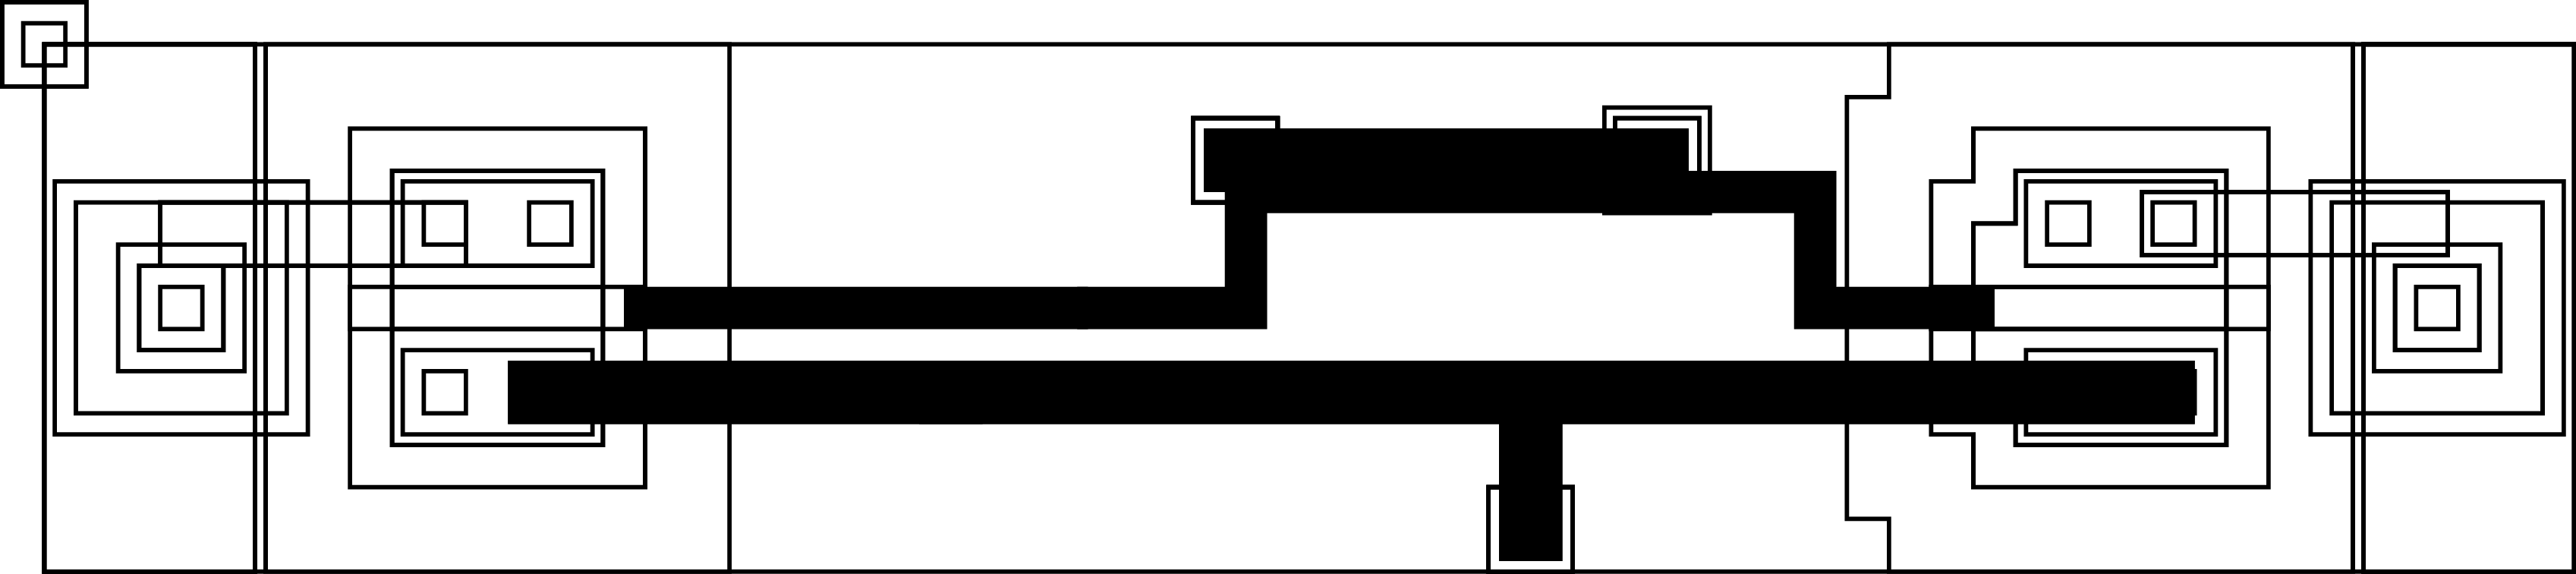

In [5]:
pdfio = BytesIO()
lib.draw(pdfio, scale=10)
plot(pdfio)

The structure in the top left is only a reference structure used in the main structure, therefore it can be removed from the drawing

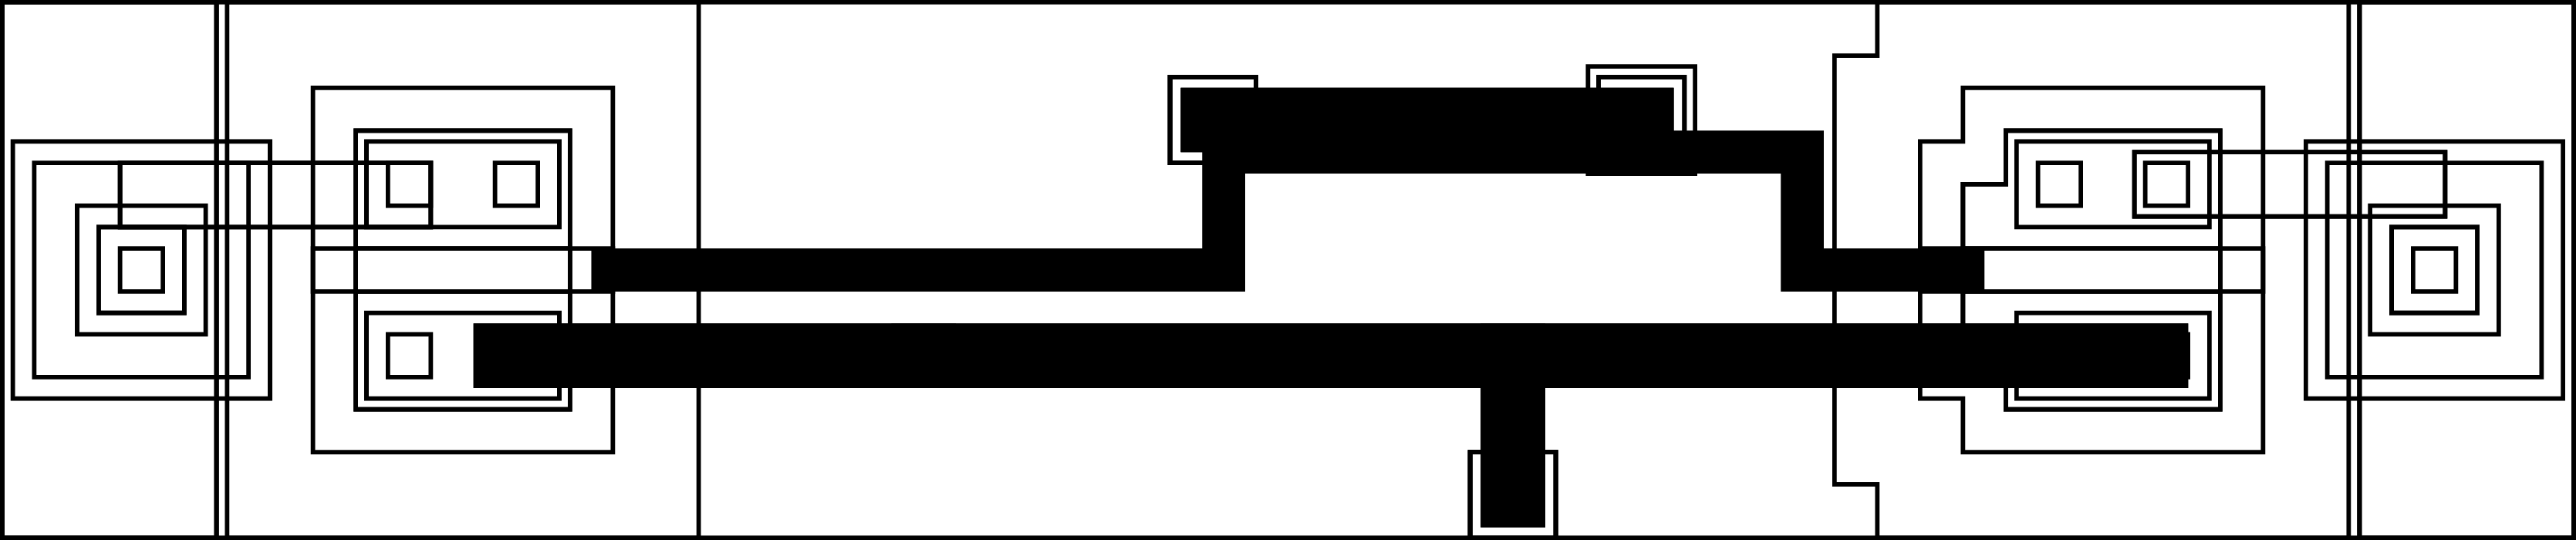

In [6]:
options = {
    "structures": ["inv1"]
}
pdfio = BytesIO()
lib.draw(pdfio, scale=10, options=options)
plot(pdfio)

## Every picture is better with colors!

Colors and patterns can be controlled using the ``options`` parameter. First the fields in the layer subdict are used, than the toplevel default value and lastly a library default.

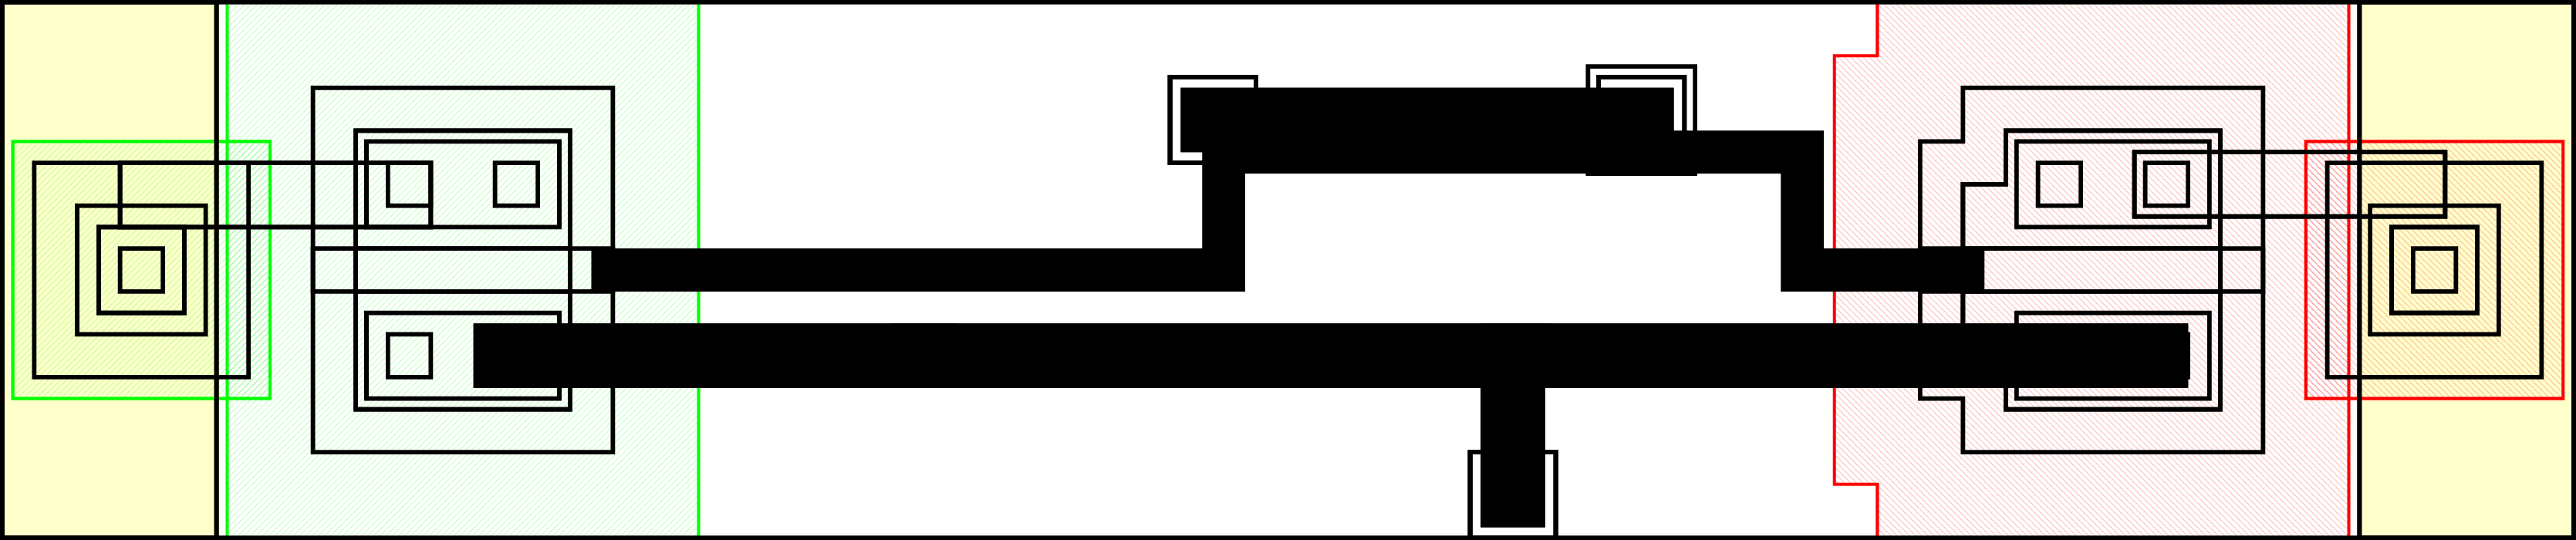

In [7]:
from libgdsii import Color, Pattern

options = {
    "structures": ["inv1"],
    2: {
        "line_width": 2,
        "fill_color": Color(1, 1, 0, .2),
        "stroke_color": Color(1, 1, 0)
    },
    41: {
        "line_width": 1.4,
        "fill_color": Color(0, 1, 0, .2),
        "pattern": Pattern.NORTH_WEST_LINES,
        "stroke_color": Color(0, 1, 0)
    },
    42: {
        "line_width": 1.4,
        "fill_color": Color(1, 0, 0, .2),
        "pattern": Pattern.NORTH_EAST_LINES,
        "stroke_color": Color(1, 0, 0)
    }
}

pdfio = BytesIO()
lib.draw(pdfio, scale=10, options=options)
plot(pdfio)

## Layer selection and ordering
Specific layers, aswell as the layer order can be set using the ``order`` key. If not set, all layer will be rendered in ascending order.

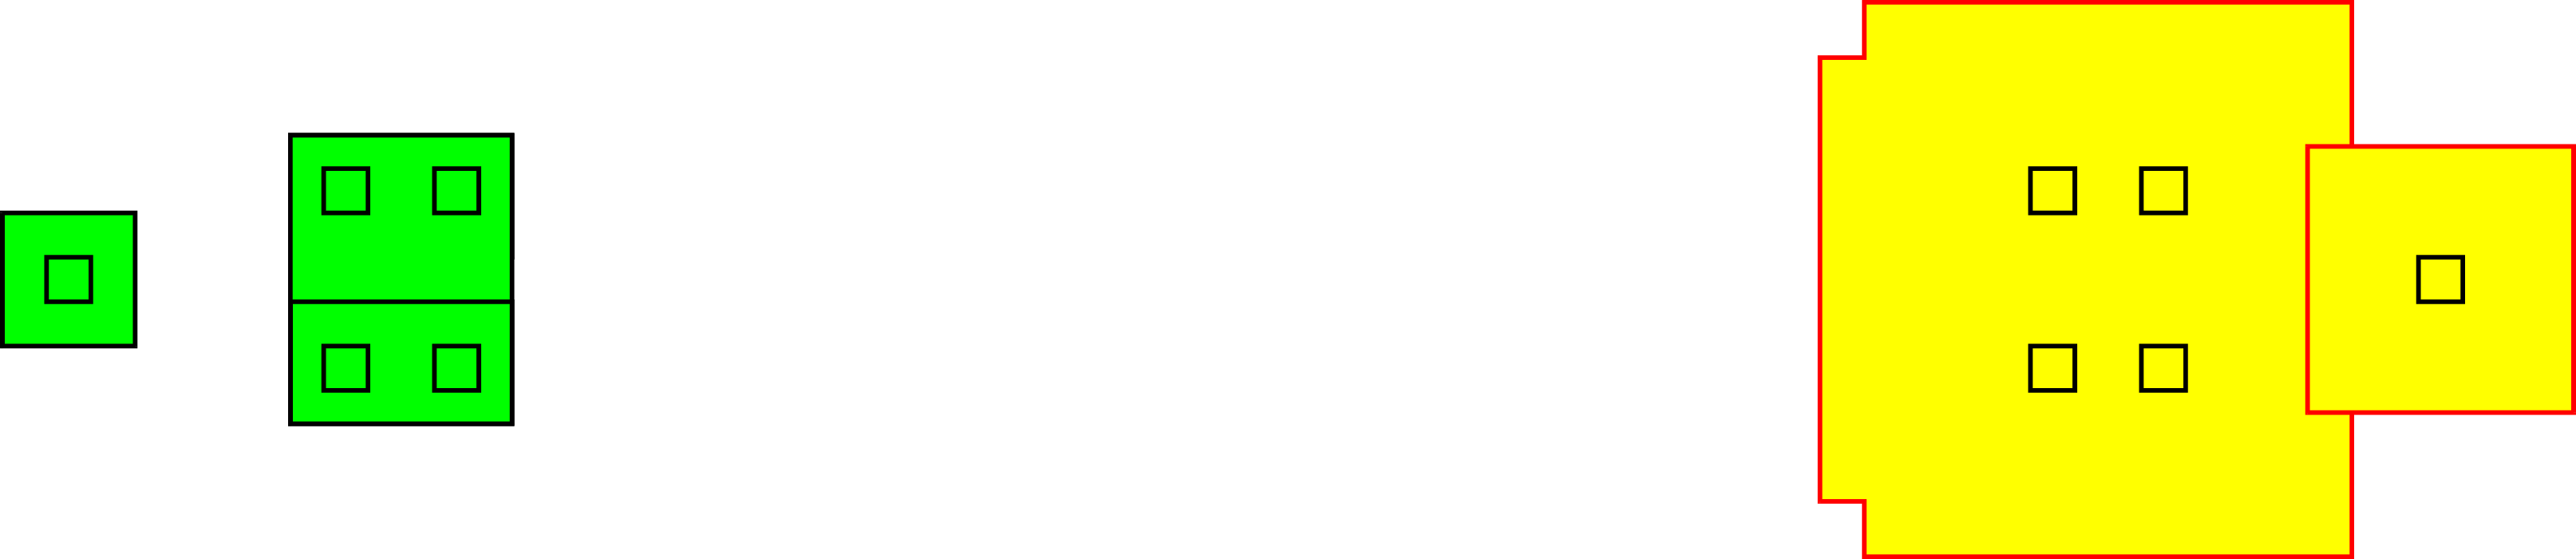

In [8]:
options = {
    "order": [43, 42, 48],
    "line_width": 2,
    42: {
        "fill_color": Color(1, 1, 0),
        "stroke_color": Color(1, 0, 0)
    },
    43: {
        "fill_color": Color(0, 1, 0),
    }
}

pdfio = BytesIO()
lib.draw(pdfio, scale=10, options=options)
plot(pdfio)

## Not so clever layer order (layers 43 and 42 cover layer 48)

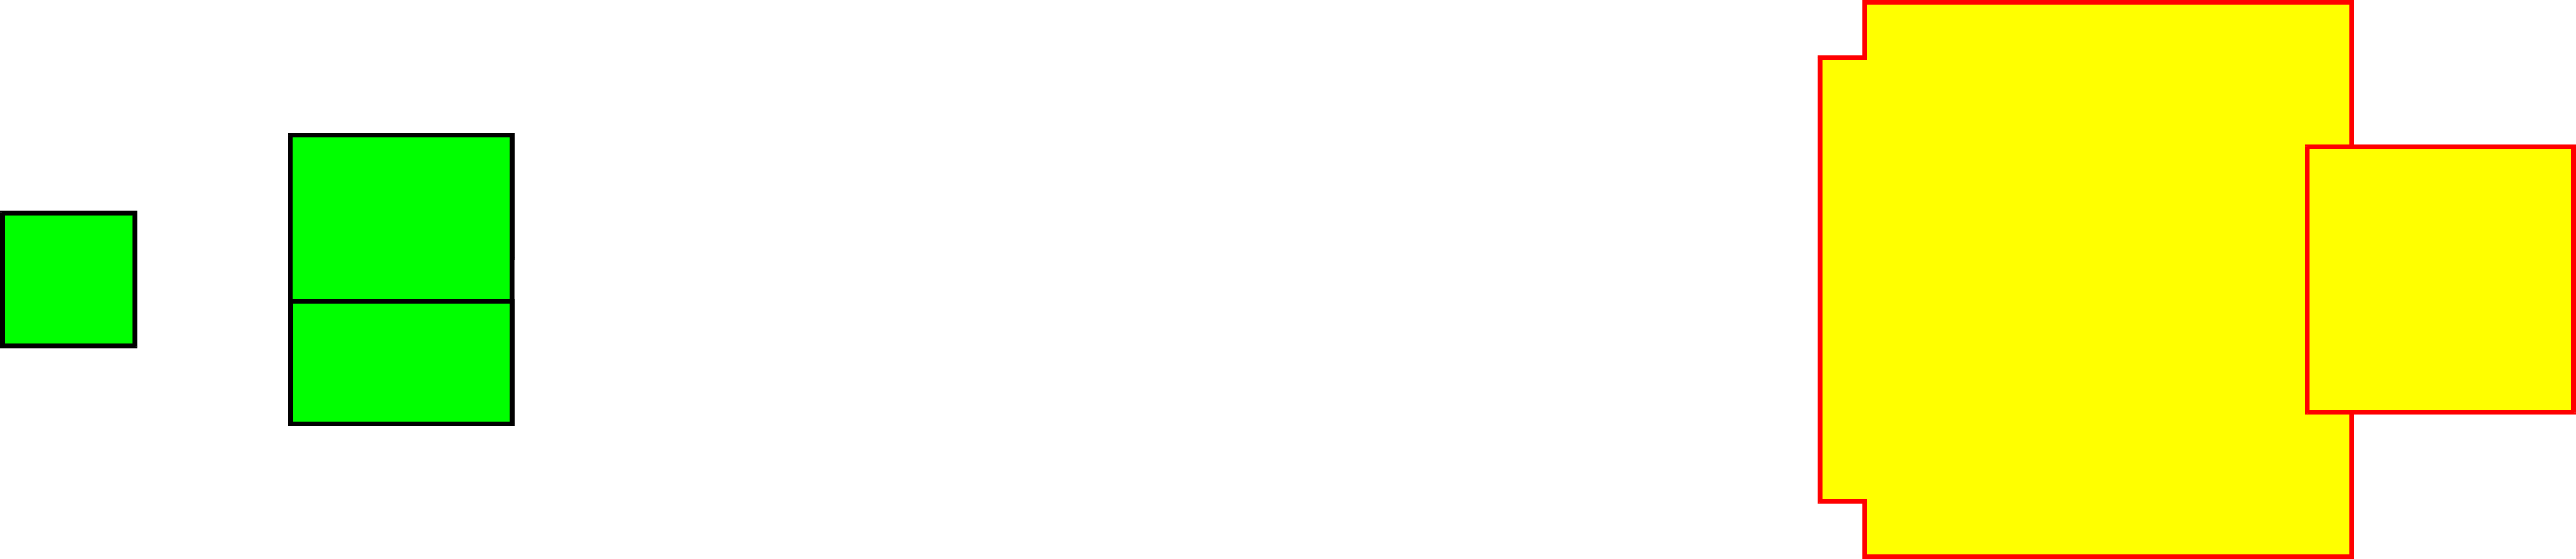

In [9]:
options = {
    "order": [48, 43, 42],
    "line_width": 2,
    42: {
        "fill_color": Color(1, 1, 0),
        "stroke_color": Color(1, 0, 0)
    },
    43: {
        "fill_color": Color(0, 1, 0),
    }
}

pdfio = BytesIO()
lib.draw(pdfio, scale=10, options=options)
plot(pdfio)